In [36]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [37]:
#read the dataset
data = pd.read_csv('final_data.csv')

In [38]:
len(data)

8008

In [39]:
#remove entries with NaN values for columns taken as features
data = data[data['publication_year'].notna()]
data = data[data['authors'].notna()]
data = data[data['num_pages'].notna()]
data = data[data['genre'].notna()]

In [40]:
len(data)

5347

In [41]:
#determine age of book as (2020 - publication_year)
data['age'] = [(2020 - int(x)) for x in data['publication_year']] 

In [42]:
#select columns title, authors, num_pages, age, genre, and average_rating as data
data = data[['authors', 'num_pages', 'age', 'genre', 'average_rating']]

In [43]:
#look at the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5347 entries, 0 to 8006
Data columns (total 5 columns):
authors           5347 non-null object
num_pages         5347 non-null float64
age               5347 non-null int64
genre             5347 non-null object
average_rating    5347 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 250.6+ KB


In [44]:
#Anomaly detection

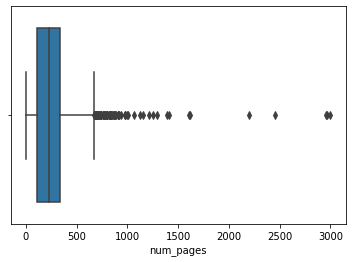

In [45]:
# find no. of pages outliers
sns.boxplot(x=data['num_pages'])

In [46]:
# remove outliers from no. of pages 
data = data.drop(data.index[data['num_pages'] >= 1000])

In [47]:
len(data)

5331

In [48]:
#Feature Engineering
#Transforming textual features into numerical features

In [49]:
le = preprocessing.LabelEncoder()

In [50]:
#encode authors column
data['authors'] = le.fit_transform(data['authors'])

In [51]:
#encode genre column
data['genre'] = le.fit_transform(data['genre'])

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5331 entries, 0 to 8006
Data columns (total 5 columns):
authors           5331 non-null int64
num_pages         5331 non-null float64
age               5331 non-null int64
genre             5331 non-null int64
average_rating    5331 non-null float64
dtypes: float64(2), int64(3)
memory usage: 249.9 KB


In [53]:
#Linear Regression

In [54]:
# divide the data into attributes and labels
X = data.drop(['average_rating'], axis = 1)
y = data['average_rating']

In [55]:
# split 80% of the data to the training set and 20% of the data to test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [56]:
#save dataframes as csv
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_frame().to_csv('y_train.csv')
y_test.to_frame().to_csv('y_test.csv')

In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
predictions = lr.predict(X_test)

In [59]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,3.64,3.926094
1,4.24,3.944888
2,4.08,3.892507
3,4.21,3.871408
4,3.99,3.930625
5,3.90,3.935830
6,4.04,3.924351
7,4.32,3.883338
8,4.12,3.874602
9,4.17,3.855039


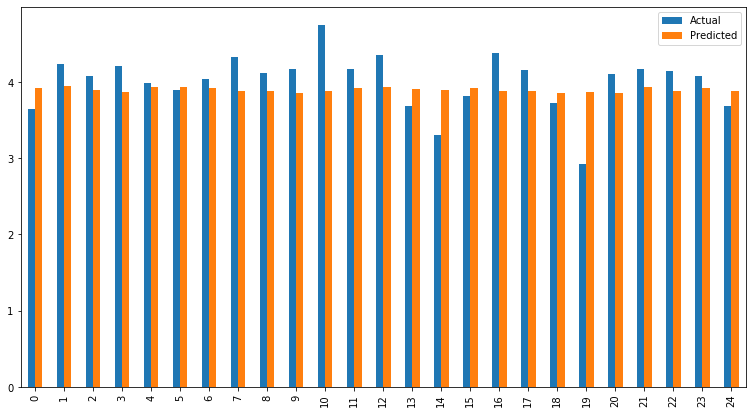

In [60]:
# visualise the above comparison result
pred.plot(kind='bar', figsize=(13, 7))

In [61]:
# evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2776167878627979
MSE: 0.12774518548521124
RMSE: 0.35741458488037564
